# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"  # OpenWeatherMap API endpoint

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"  # Add city name and API key to URL
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  # Request weather data for the city

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]  # Latitude
        city_lng = city_weather["coord"]["lon"]  # Longitude
        city_max_temp = city_weather["main"]["temp_max"]  # Maximum temperature
        city_humidity = city_weather["main"]["humidity"]  # Humidity percentage
        city_clouds = city_weather["clouds"]["all"]  # Cloudiness percentage
        city_wind = city_weather["wind"]["speed"]  # Wind speed in m/s
        city_country = city_weather["sys"]["country"]  # Country code
        city_date = city_weather["dt"]  # Date of data

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | keflavik
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | brokopondo
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | porto novo
Processing Record 6 of Set 1 | mugia
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | dakhla
Processing Record 10 of Set 1 | kapa'a
Processing Record 11 of Set 1 | mejit
Processing Record 12 of Set 1 | quellon
Processing Record 13 of Set 1 | pariaman
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | sinabang
Processing Record 16 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 17 of Set 1 | sola
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | changling
Processing Record 21 of Set 1 | guarapari
Processing Record 22 of Set 1 | nuuk
Processing R

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  # Create DataFrame from city data list

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,keflavik,64.0049,-22.5624,-2.47,66,8,13.20,IS,1736138304
1,ushuaia,-54.8000,-68.3000,6.82,96,65,1.43,AR,1736138292
2,brokopondo,4.7500,-55.1667,23.94,81,99,3.22,SR,1736138306
3,adamstown,-25.0660,-130.1015,24.17,69,85,3.43,PN,1736138307
4,porto novo,6.4965,2.6036,25.41,90,69,2.13,BJ,1736138309


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keflavik,64.0049,-22.5624,-2.47,66,8,13.20,IS,1736138304
1,ushuaia,-54.8000,-68.3000,6.82,96,65,1.43,AR,1736138292
2,brokopondo,4.7500,-55.1667,23.94,81,99,3.22,SR,1736138306
3,adamstown,-25.0660,-130.1015,24.17,69,85,3.43,PN,1736138307
4,porto novo,6.4965,2.6036,25.41,90,69,2.13,BJ,1736138309


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

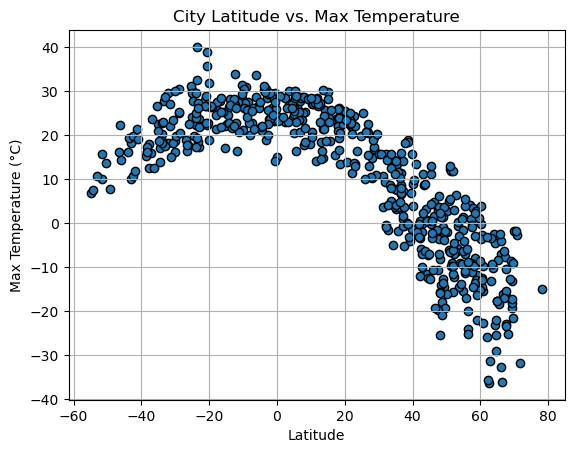

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")  # Scatter plot with edge colors

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")  # Title of the plot
plt.xlabel("Latitude")  # Label for x-axis
plt.ylabel("Max Temperature (°C)")  # Label for y-axis
plt.grid(True)  # Add grid lines

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

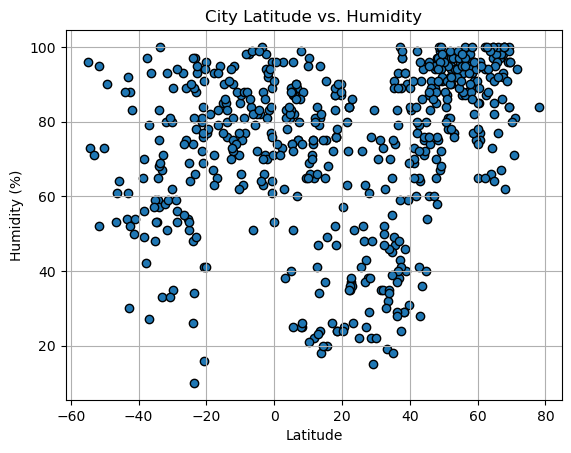

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

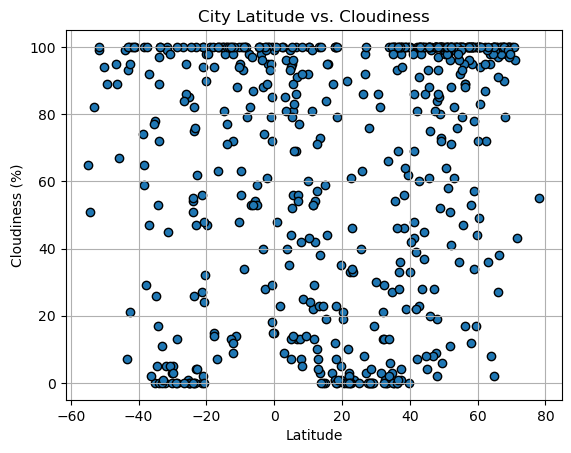

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

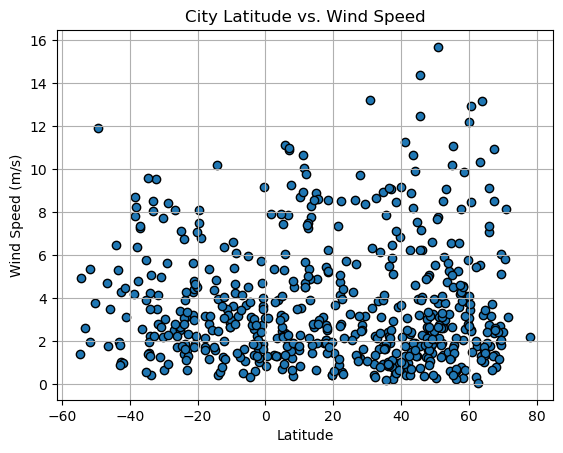

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, r_value, _, _ = linregress(x, y)  
    regression_line = slope * x + intercept  # Calculate regression line
    plt.scatter(x, y, edgecolor="black")  # Create scatter plot
    plt.plot(x, regression_line, color="red")  # Add regression line
    plt.title(title)  # Add plot title
    plt.xlabel(xlabel)  # Add x-axis label
    plt.ylabel(ylabel)  # Add y-axis label
    plt.grid(True)  # Add grid lines
    return f"R-squared: {r_value**2:.2f}"  # Return R-squared value


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]  # Filter cities in the Northern Hemisphere

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keflavik,64.0049,-22.5624,-2.47,66,8,13.20,IS,1736138304
2,brokopondo,4.7500,-55.1667,23.94,81,99,3.22,SR,1736138306
4,porto novo,6.4965,2.6036,25.41,90,69,2.13,BJ,1736138309
5,mugia,43.1041,-9.2179,11.06,64,100,8.91,ES,1736138310
8,dakhla,23.6848,-15.9580,16.46,51,1,5.72,EH,1736138313


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]  # Filter cities in the Southern Hemisphere

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,6.82,96,65,1.43,AR,1736138292
3,adamstown,-25.0660,-130.1015,24.17,69,85,3.43,PN,1736138307
6,afaahiti,-17.7500,-149.2833,25.62,71,15,2.18,PF,1736138311
7,papatowai,-46.5619,169.4708,16.10,53,95,4.74,NZ,1736138312
11,quellon,-43.1167,-73.6167,9.96,92,93,1.97,CL,1736138317


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.78


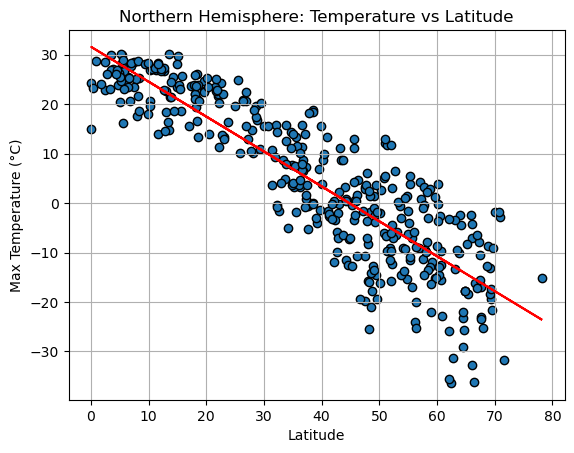

In [31]:
# Linear regression on Northern Hemisphere
plt.figure()
r_squared_north_temp = plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
    "Northern Hemisphere: Temperature vs Latitude", 
    "Latitude", "Max Temperature (°C)"
)
print(r_squared_north_temp)  # Print R-squared value
plt.show()

R-squared: 0.34


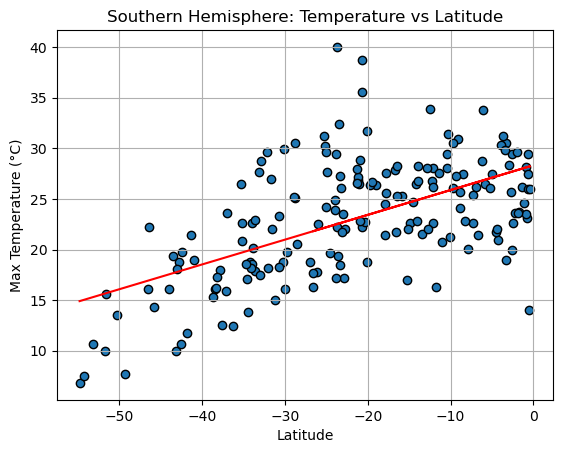

In [32]:
# Linear regression on Southern Hemisphere
plt.figure()
r_squared_south_temp = plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
    "Southern Hemisphere: Temperature vs Latitude", 
    "Latitude", "Max Temperature (°C)"
)
print(r_squared_south_temp)  # Print R-squared value
plt.show()

**Discussion about the linear relationship:** 
- **Northern Hemisphere**: A strong negative correlation exists between latitude and temperature, indicating that temperatures decrease as you move farther from the equator.
- **Southern Hemisphere**: A positive correlation exists, with temperatures increasing as you move closer to the equator.


### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.17


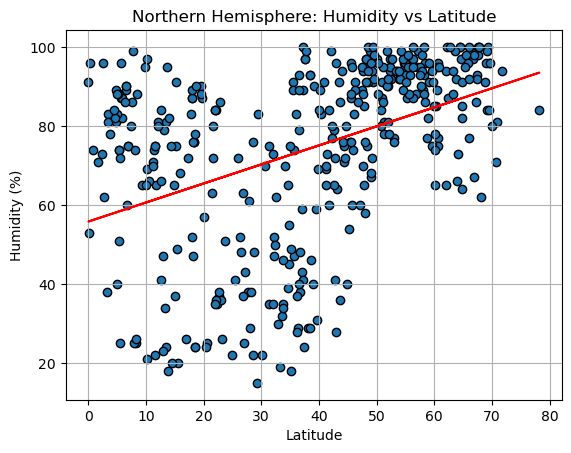

In [33]:
# Northern Hemisphere
plt.figure()
r_squared_north_humidity = plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
    "Northern Hemisphere: Humidity vs Latitude", 
    "Latitude", "Humidity (%)"
)
print(r_squared_north_humidity)  # Print R-squared value
plt.show()

R-squared: 0.10


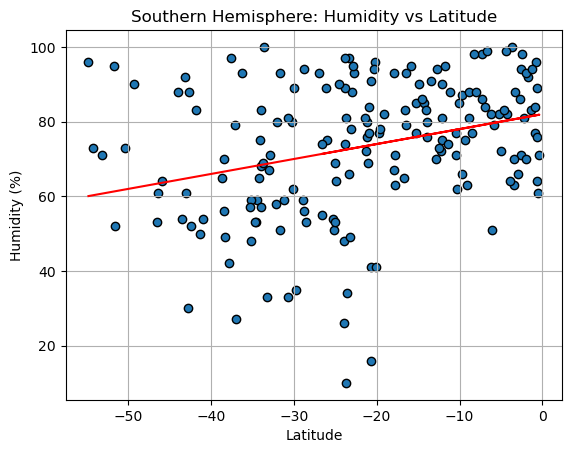

In [34]:
# Southern Hemisphere
plt.figure()
r_squared_south_humidity = plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
    "Southern Hemisphere: Humidity vs Latitude", 
    "Latitude", "Humidity (%)"
)
print(r_squared_south_humidity)  # Print R-squared value
plt.show()

**Discussion about the linear relationship:** 
- **Northern Hemisphere**: Humidity shows a weak correlation with latitude, suggesting it is influenced by other factors.
- **Southern Hemisphere**: Humidity also shows no strong correlation with latitude.


### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.15


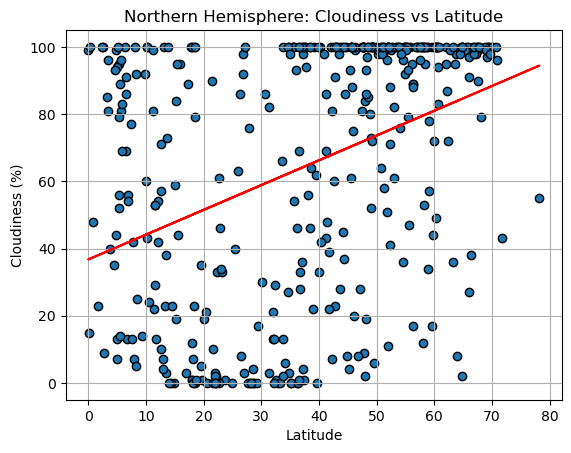

In [35]:
# Northern Hemisphere
plt.figure()
r_squared_north_cloudiness = plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
    "Northern Hemisphere: Cloudiness vs Latitude", 
    "Latitude", "Cloudiness (%)"
)
print(r_squared_north_cloudiness)  # Print R-squared value
plt.show()

R-squared: 0.02


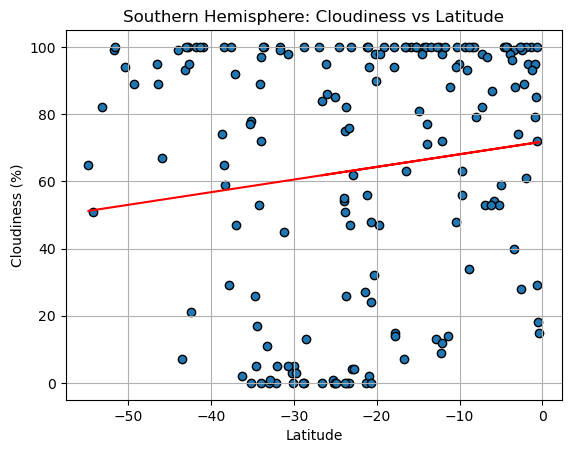

In [36]:
# Southern Hemisphere
plt.figure()
r_squared_south_cloudiness = plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
    "Southern Hemisphere: Cloudiness vs Latitude", 
    "Latitude", "Cloudiness (%)"
)
print(r_squared_south_cloudiness)  # Print R-squared value
plt.show()

**Discussion about the linear relationship:** 
- **Northern Hemisphere**: Cloudiness shows no significant correlation with latitude.
- **Southern Hemisphere**: Similarly, cloudiness does not strongly correlate with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.00


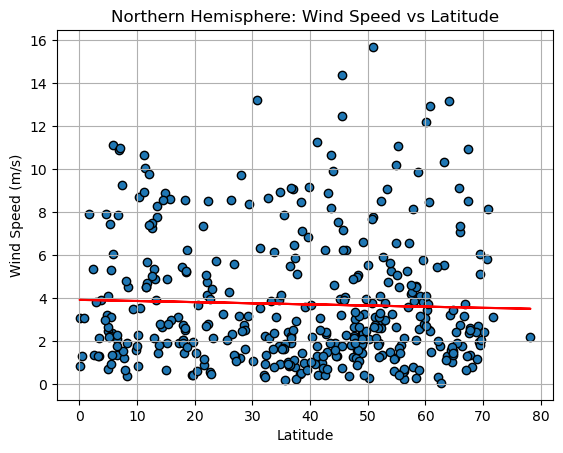

In [37]:
# Northern Hemisphere
plt.figure()
r_squared_north_wind = plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
    "Northern Hemisphere: Wind Speed vs Latitude", 
    "Latitude", "Wind Speed (m/s)"
)
print(r_squared_north_wind)  # Print R-squared value
plt.show()

R-squared: 0.04


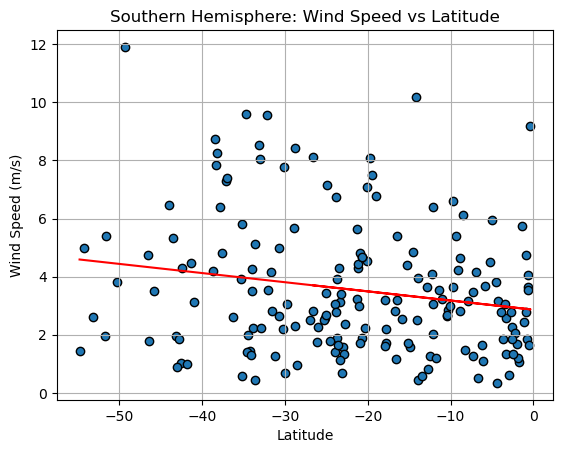

In [38]:
# Southern Hemisphere
plt.figure()
r_squared_south_wind = plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
    "Southern Hemisphere: Wind Speed vs Latitude", 
    "Latitude", "Wind Speed (m/s)"
)
print(r_squared_south_wind)  # Print R-squared value
plt.show()

**Discussion about the linear relationship:** 
- **Northern Hemisphere**: Wind speed shows no strong correlation with latitude.
- **Southern Hemisphere**: Wind speed similarly lacks a significant correlation with latitude.